In [45]:
import pandas as pd
import numpy as np

In [46]:
flats_df = pd.read_csv("MSK/MSK_addr_area_price_lon_lat.csv", sep=",")

In [47]:
flats_df.head()

,address,area,price,longtitude,latitude
0,"Москва, ул. Сущёвский Вал, 55",155.0,286000,55.793698,37.614410
1,"Москва, пос. Московский, дер. Румянцево, д. 2,...",75.4,116428,55.633963,37.425468
2,"Москва, Ленинский пр-т, 95Б",106.1,282752,55.672905,37.524318
3,"Москва, Конаковский пр.",82.0,206024,55.845911,37.482151
4,"Москва, пр-т Ленинградский, ЖК «Царская площадь»",94.5,275132,55.784779,37.562703


In [56]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

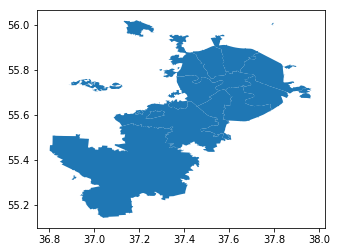

In [57]:
distr_map = gpd.read_file('exportsh/MSK/Central Administrative Okrug_AL5.shp', encoding="utf-8")
distr_map.plot()

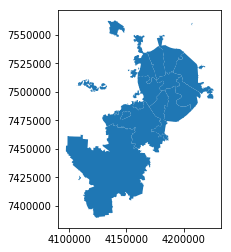

In [58]:
crs = {"init": "epsg:3857"}
distr_map_ep = distr_map.to_crs(crs)
distr_map_ep.plot()

In [59]:
points = [Point(xy) for xy in zip(flats_df.latitude.astype(float), flats_df.longtitude.astype(float))]
crs = {'init' :'epsg:4326'}
flats_geo = GeoDataFrame(flats_df, geometry=points, crs=crs)
flats_geo_ep = flats_geo.to_crs({"init": "epsg:3857"})

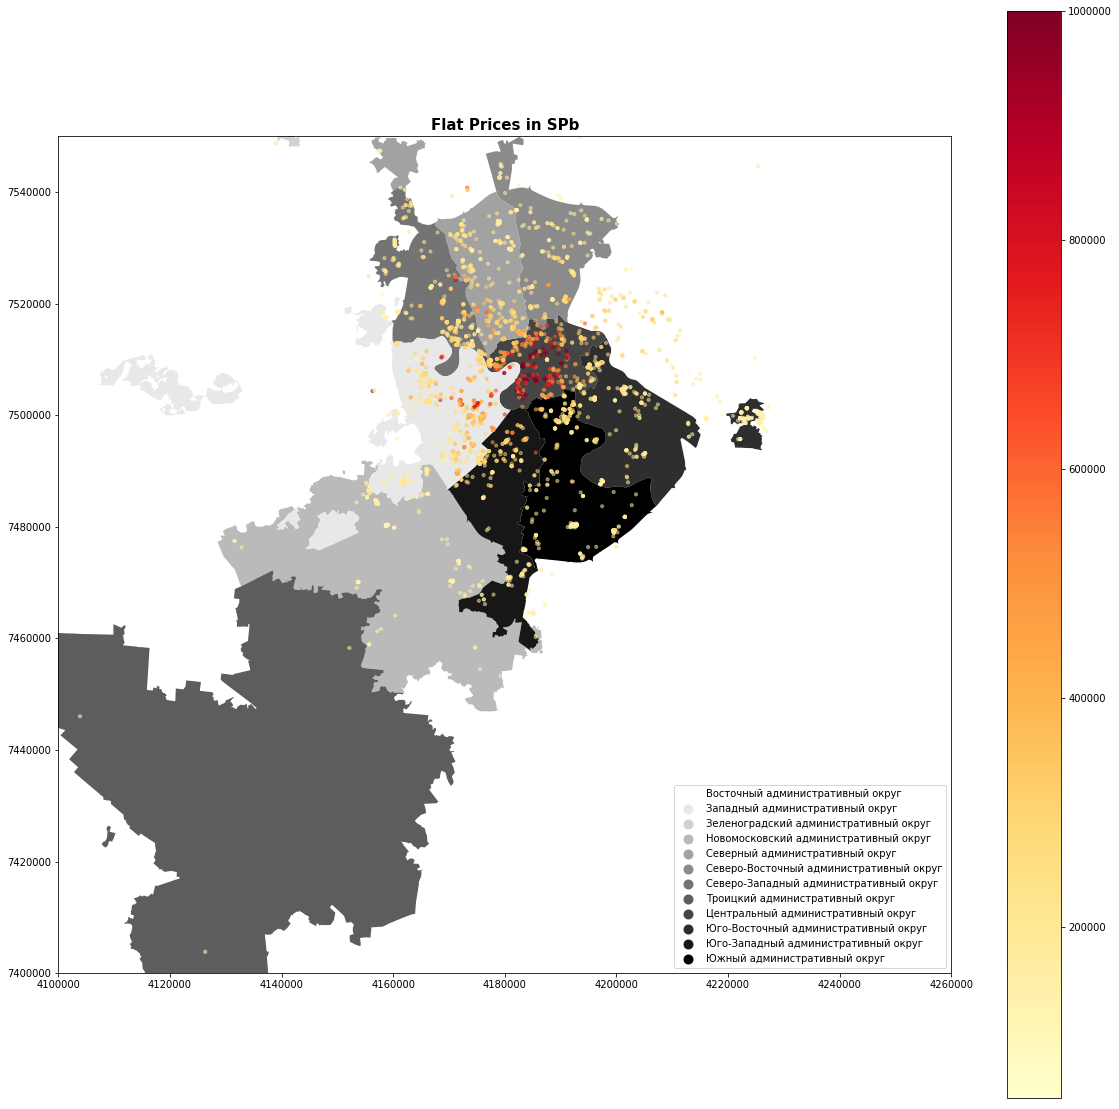

In [61]:
fig, ax = plt.subplots(figsize=(20,20))
distr_map_ep.plot(ax=ax, column = 'locname', linewidth=0.5, cmap='binary', legend=True)
flats_geo_ep.plot(column="price",ax=ax, alpha=0.5, legend=True, markersize=10, cmap="YlOrRd", vmin=50000, vmax=1000000)
plt.title("Flat Prices in SPb", fontsize=15, fontweight="bold")
plt.ylim(7400000,7550000)
plt.xlim( 4100000,4260000)
plt.show()

In [62]:
count_price = {}

for point in flats_geo.geometry:    
    for i, geometry in enumerate(distr_map.geometry):
        if point.within(geometry):
            if count_price.get(distr_map.locname[i], None) is None:
                count_price[distr_map.locname[i]] = [flats_geo.price[i]]
            else:
                count_price[distr_map.locname[i]].append(flats_geo.price[i])

In [63]:
from functools import reduce

aver_price = {}
for k, lst in count_price.items():
    aver_price[k] = reduce(lambda a, b: a + b, lst) / len(lst) 
    
#aver_price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

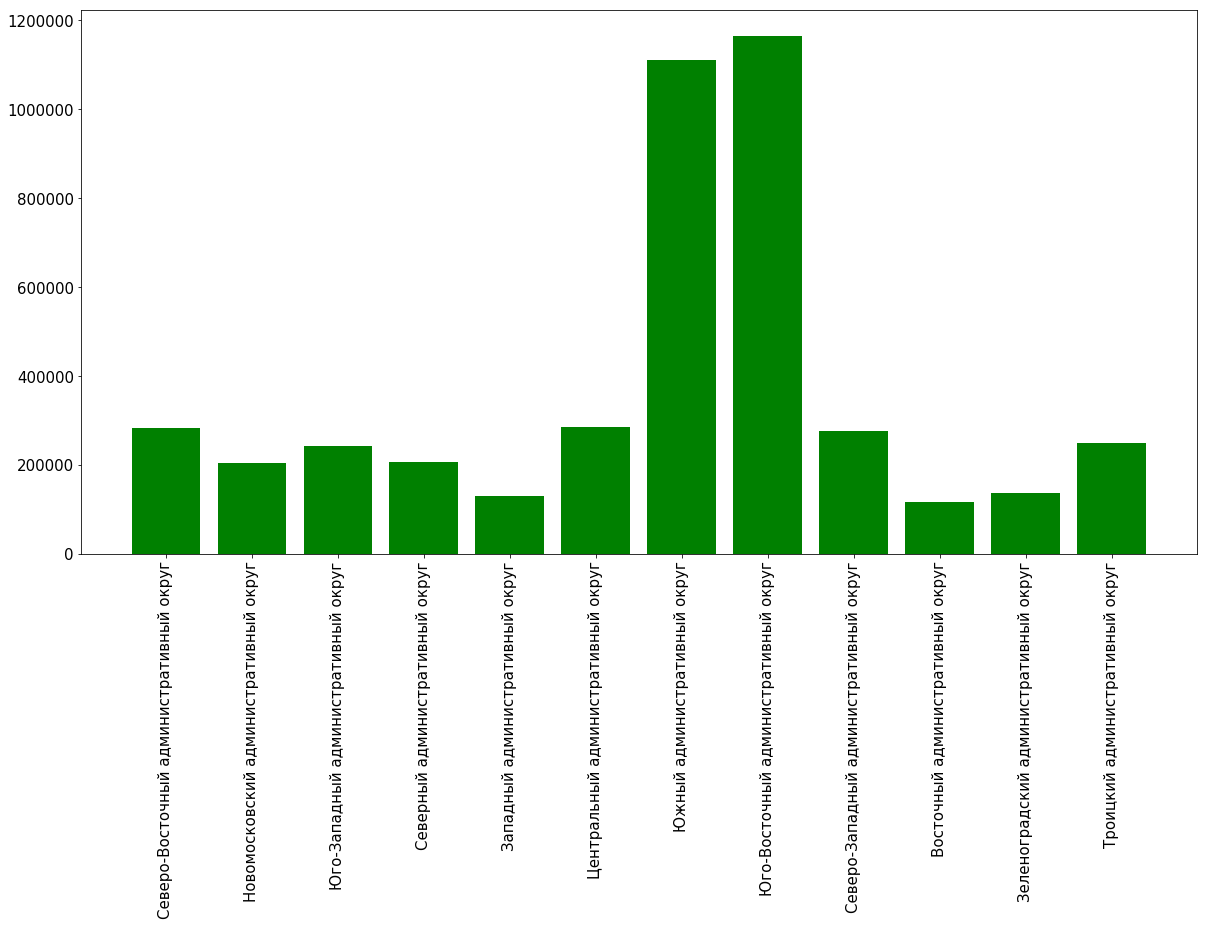

In [64]:
plt.figure(figsize=(20,10))
plt.bar(aver_price.keys(), aver_price.values(), color='g')
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)

In [65]:
#  Визуализация по средней площади квартиры

In [66]:
count_area = {}

for point in flats_geo.geometry:    
    for i, geometry in enumerate(distr_map.geometry):
        if point.within(geometry):
            if count_area.get(distr_map.locname[i], None) is None:
                count_area[distr_map.locname[i]] = [flats_geo["area"][i]]
            else:
                count_area[distr_map.locname[i]].append(flats_geo["area"][i])

In [67]:
aver_area = {}

for k, lst in count_area.items():
    aver_area[k] = reduce(lambda a, b: a + b, lst) / len(lst) 
    
#aver_area

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

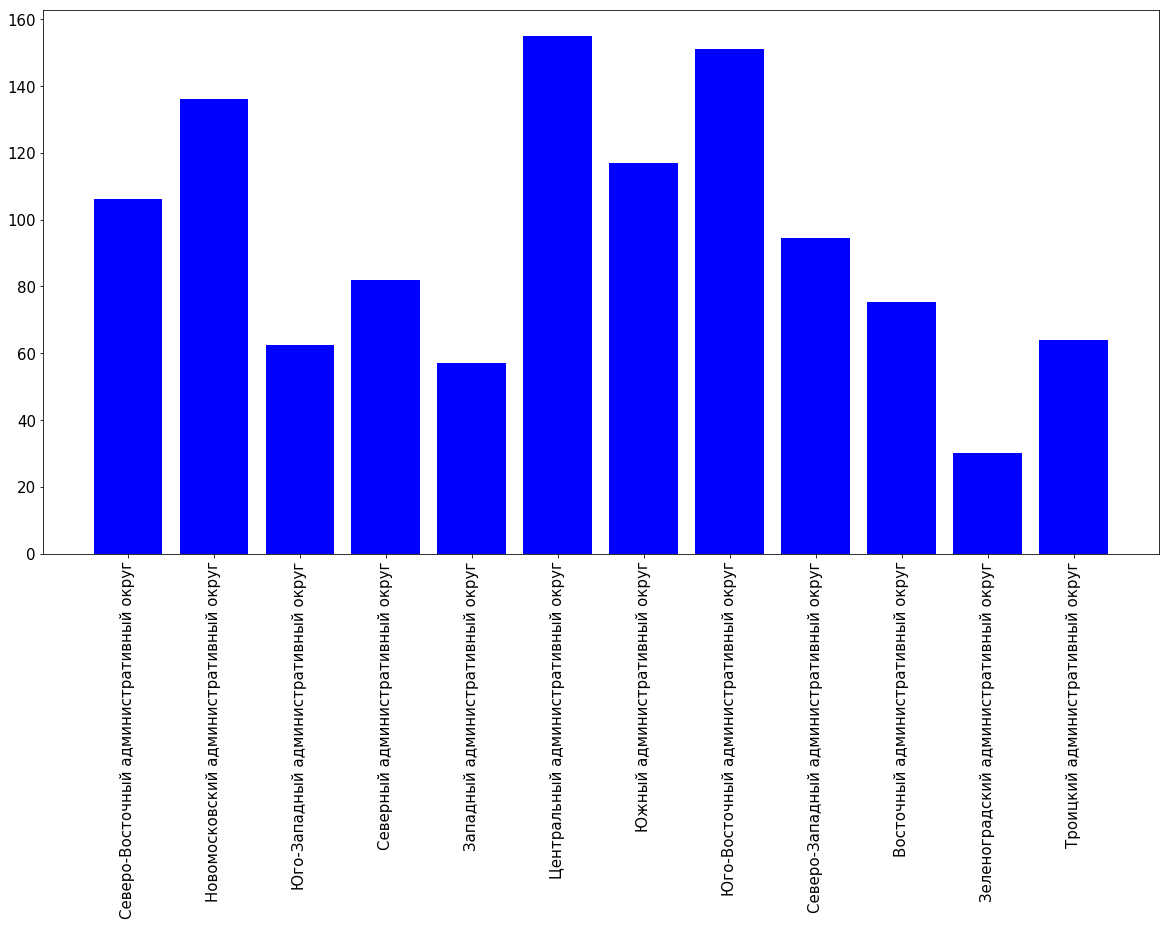

In [69]:
plt.figure(figsize=(20,10))
plt.bar(aver_area.keys(), aver_area.values(), color='b')
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)

In [70]:
# Визуализация с помощью folium

In [71]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [72]:
def data_unq(df):
    l_addr = len(df.address.unique())
    l_lon = len(df.longtitude.unique())
    l_lat = len(df.latitude.unique())
    l_price = len(df.price.unique())
    print(f"l_addr: {l_addr}, l_lon: {l_lon}, l_lat: {l_lat}, l_price: {l_price}")

data_unq(flats_df)

l_addr: 2232, l_lon: 1500, l_lat: 1496, l_price: 3280


In [73]:
max_price = float(flats_df.price.max())
min_price = float(flats_df.price.min())
max_price, min_price

(2837394.0, 50000.0)

In [74]:
location = [55.793698, 37.614410]
mymap = folium.Map(location=location, zoom_start=10)
mc = MarkerCluster()
lon, lat = 'longtitude', 'latitude'

for _, row in flats_df.iterrows():
    mc.add_child(folium.Marker(location=[row[lon], row[lat]]))
    mymap.add_child(mc)
mymap

In [75]:
lon = flats_df.longtitude.values.astype(float)
hmap = HeatMap(l_data, min_opacity=0.2, max_val=max(price), radius=10, blur=10, max_zoom=1,)
hmap.add_to(mymap)
mymap
lat = flats_df.latitude.values.astype(float)
price = flats_df.price.values.astype(float)
lat, lon, price
l_data = list(zip(lon, lat, price))
#l_data

In [76]:
hmap = HeatMap(l_data, min_opacity=0.2, max_val=max(price), radius=10, blur=10, max_zoom=1,)
hmap.add_to(mymap)
mymap

In [ ]:
#hmap = HeatMap(l_data, max_val=max(price)*0.7, radius=5, blur=15, min_opacity=0.2)
#hmap.add_to(mymap)
#mymap